# MTData: Profile Example

Now that we've created an `MTCollection` object we can use it to do the more interesting things, like analyze strike, plot phase tensors, create inputs for modeling programs.

## 1. Open Collection

In the previous notebook we created an `MTCollection` object called `test_mt_collection.h5`.  Lets open it and get the profile.

In [1]:
from pathlib import Path

from mtpy import MTCollection

2023-04-13 15:58:37,158 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


In [2]:
mtc = MTCollection()
mtc.open_collection(Path().cwd().joinpath("test_mt_collection.h5"))

In [3]:
mtc.working_dataframe = mtc.master_dataframe.loc[
    mtc.master_dataframe.survey == "profile"
].query('station.str.startswith("15")')

In [4]:
mtc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
59,15125A,profile,-22.370806,149.188639,200.0,15125A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
60,15126A,profile,-22.370639,149.193500,200.0,15126A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
61,15127A,profile,-22.371028,149.198417,201.0,15127A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
62,15128A,profile,-22.370861,149.203306,200.0,15128A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
63,15129A,profile,-22.371083,149.208083,202.0,15129A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
64,15130A,profile,-22.371222,149.212972,201.0,15130A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>


## 2. Convert to MTData

Now that we have the profile let's convert it to an `MTData` object.

In [5]:
mtd = mtc.to_mt_data()

### 2a. Close MTCollection

You can now close the MTCollection to make sure if something crashes the file won't get corrupt for unknown reasons.

In [6]:
mtc.close_collection()

2023-04-13 15:58:39,842 [line 755] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\examples\notebooks\test_mt_collection.h5


In [7]:
mtd

MTData([('profile.15125A',
         TF( station='15125A', latitude=-22.37, longitude=149.19, elevation=200.00 )),
        ('profile.15126A',
         TF( station='15126A', latitude=-22.37, longitude=149.19, elevation=200.00 )),
        ('profile.15127A',
         TF( station='15127A', latitude=-22.37, longitude=149.20, elevation=201.00 )),
        ('profile.15128A',
         TF( station='15128A', latitude=-22.37, longitude=149.20, elevation=200.00 )),
        ('profile.15129A',
         TF( station='15129A', latitude=-22.37, longitude=149.21, elevation=202.00 )),
        ('profile.15130A',
         TF( station='15130A', latitude=-22.37, longitude=149.21, elevation=201.00 ))])

### 2b. Setting UTM CRS

Its important to set the `MTData.utm_crs` attribute to make sure that stations can be projected into meters for plotting and creating model files.   You can do this a couple of ways either through the `utm_crs` method or if you know the `EPSG` number you can input that.  They should both do the same if you input the number.


In [ ]:
mtd.utm_crs = 

## 3. Plot Phase Tensor Pseudosection

ValueError: utm_crs is None, cannot project onto profile line.

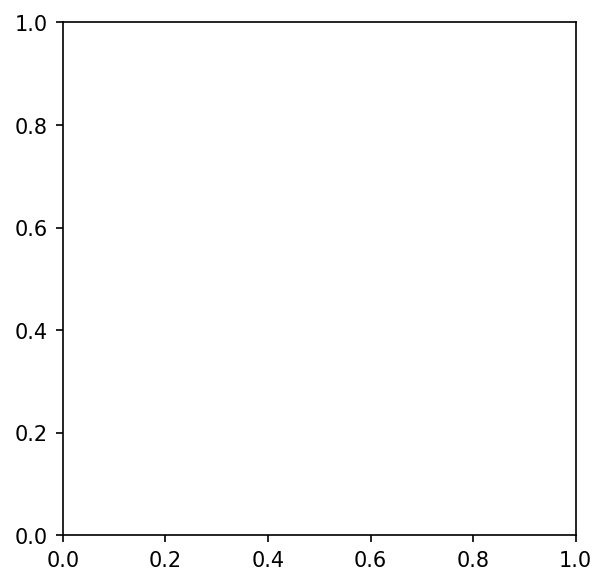

In [8]:
ptps_plot = mtd.plot_phase_tensor_pseudosection()

In [ ]:
ptps_plot.x_stretch = 100000000
ptps_plot.redraw_plot()

In [ ]:
ptps_plot.mt_data.station_locations.profile_offset

In [ ]:
for a in ptps_plot.mt_data.values():
    a.project_onto_profile_line(ptps_plot.profile_line[0], ptps_plot.profile_line[1])
    print(a.profile_offset, a.longitude, a.latitude, a.east, a.north)